In [1]:
import pandas as pd
from autogluon.tabular import TabularPredictor
import autogluon.core as ag
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import seaborn as sns

In [2]:
train = pd.read_csv('https://bike-share-data.s3.us-west-2.amazonaws.com/train.csv', 
                    parse_dates=['datetime'], 
                    index_col='datetime').drop(columns=['casual', 'registered'])
scaler = StandardScaler()
train[['temp', 'atemp','humidity', 'windspeed']] = scaler.fit_transform(train[['temp', 'atemp','humidity', 'windspeed']])
train.head()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,count
datetime,,,,,,,,,
2011-01-01 00:00:00,1,0,0,1,-1.333661,-1.092737,0.993213,-1.567754,16
2011-01-01 01:00:00,1,0,0,1,-1.438907,-1.182421,0.941249,-1.567754,40
2011-01-01 02:00:00,1,0,0,1,-1.438907,-1.182421,0.941249,-1.567754,32
2011-01-01 03:00:00,1,0,0,1,-1.333661,-1.092737,0.681430,-1.567754,13
2011-01-01 04:00:00,1,0,0,1,-1.333661,-1.092737,0.681430,-1.567754,1


In [3]:
import matplotlib.pyplot as plt

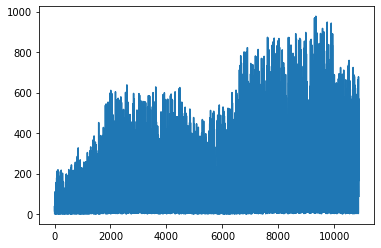

In [4]:
plt.plot(train['count'].to_list())

In [5]:
training_data = train.sample(frac=0.27)
test_data = train.drop(training_data.index)

In [6]:
len(training_data)

2939

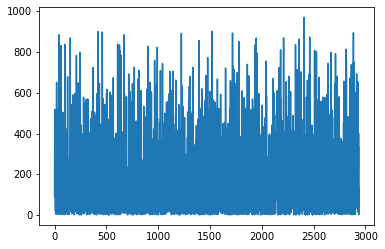

In [7]:
plt.plot(training_data['count'].to_list())

In [8]:
train_data = train.drop(test_data.index) 

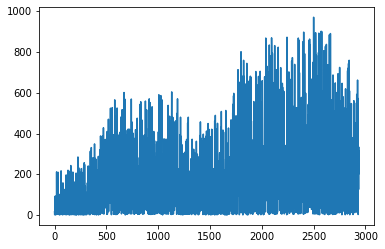

In [9]:
plt.plot(train_data['count'].to_list())

In [10]:
training_data = test_data

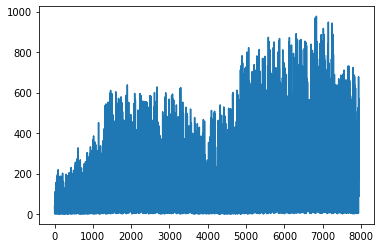

In [11]:
plt.plot(test_data['count'].to_list())

In [12]:
train_data

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,count
datetime,,,,,,,,,
2011-01-01 00:00:00,1,0,0,1,-1.333661,-1.092737,0.993213,-1.567754,16
2011-01-01 06:00:00,1,0,0,1,-1.438907,-1.182421,0.941249,-1.567754,2
2011-01-01 07:00:00,1,0,0,1,-1.544154,-1.271515,1.253032,-1.567754,3
2011-01-01 08:00:00,1,0,0,1,-1.333661,-1.092737,0.681430,-1.567754,8
2011-01-01 11:00:00,1,0,0,1,-0.702182,-0.824865,0.993213,0.759638,56
...,...,...,...,...,...,...,...,...,...
2012-12-19 11:00:00,4,0,1,1,-0.491689,-0.377626,-0.409811,0.269704,200
2012-12-19 12:00:00,4,0,1,1,-0.491689,-0.377626,-0.409811,0.759638,236
2012-12-19 16:00:00,4,0,1,1,-0.386442,-0.288532,-0.617666,1.371850,334


In [13]:
test_data

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,count
datetime,,,,,,,,,
2011-01-01 01:00:00,1,0,0,1,-1.438907,-1.182421,0.941249,-1.567754,40
2011-01-01 02:00:00,1,0,0,1,-1.438907,-1.182421,0.941249,-1.567754,32
2011-01-01 03:00:00,1,0,0,1,-1.333661,-1.092737,0.681430,-1.567754,13
2011-01-01 04:00:00,1,0,0,1,-1.333661,-1.092737,0.681430,-1.567754,1
2011-01-01 05:00:00,1,0,0,2,-1.333661,-1.271515,0.681430,-0.832442,1
...,...,...,...,...,...,...,...,...,...
2012-12-19 17:00:00,4,0,1,1,-0.491689,-0.377626,-0.617666,1.617227,562
2012-12-19 18:00:00,4,0,1,1,-0.596935,-0.467310,-0.617666,1.371850,569
2012-12-19 19:00:00,4,0,1,1,-0.596935,-0.467310,-0.617666,1.617227,336


In [14]:
label = 'count'
problem_type ='regression'
eval_metric ='root_mean_squared_error'
time_limit = 600
presets = 'best_quality'

predictor = TabularPredictor(label=label, 
                             problem_type=problem_type,
                             eval_metric=eval_metric,
                             verbosity=0).fit(train_data=train_data, 
                                              time_limit=time_limit, auto_stack = True,
                                              presets=presets)

		libcudnn.so.7: cannot open shared object file: No such file or directory
		libcudnn.so.7: cannot open shared object file: No such file or directory


In [31]:
import numpy as np

In [32]:
print(np.__version__)

1.19.5


In [15]:
predictor.fit_summary(verbosity=0)

{'model_types': {'KNeighborsUnif_BAG_L1': 'StackerEnsembleModel_KNN',
  'KNeighborsDist_BAG_L1': 'StackerEnsembleModel_KNN',
  'LightGBMXT_BAG_L1': 'StackerEnsembleModel_LGB',
  'LightGBM_BAG_L1': 'StackerEnsembleModel_LGB',
  'RandomForestMSE_BAG_L1': 'StackerEnsembleModel_RF',
  'CatBoost_BAG_L1': 'StackerEnsembleModel_CatBoost',
  'ExtraTreesMSE_BAG_L1': 'StackerEnsembleModel_XT',
  'NeuralNetFastAI_BAG_L1': 'StackerEnsembleModel_NNFastAiTabular',
  'XGBoost_BAG_L1': 'StackerEnsembleModel_XGBoost',
  'LightGBMLarge_BAG_L1': 'StackerEnsembleModel_LGB',
  'WeightedEnsemble_L2': 'WeightedEnsembleModel',
  'LightGBMXT_BAG_L2': 'StackerEnsembleModel_LGB',
  'LightGBM_BAG_L2': 'StackerEnsembleModel_LGB',
  'RandomForestMSE_BAG_L2': 'StackerEnsembleModel_RF',
  'CatBoost_BAG_L2': 'StackerEnsembleModel_CatBoost',
  'ExtraTreesMSE_BAG_L2': 'StackerEnsembleModel_XT',
  'NeuralNetFastAI_BAG_L2': 'StackerEnsembleModel_NNFastAiTabular',
  'XGBoost_BAG_L2': 'StackerEnsembleModel_XGBoost',
  'Ligh

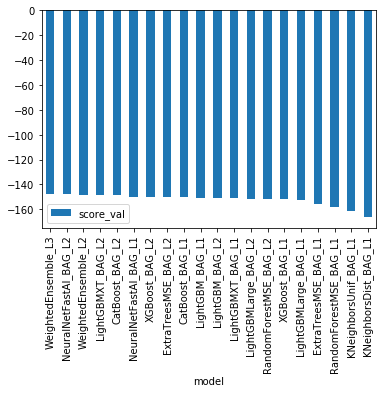

In [16]:
predictor.leaderboard(silent=True).plot(kind='bar', x='model', y='score_val')

In [19]:
predictor.get_model_best()

'WeightedEnsemble_L3'

In [20]:
testd = test_data.drop('count', 1)

In [21]:
predictor.feature_importance(test_data)

,importance,stddev,p_value,n,p99_high,p99_low
humidity,32.542352,4.854351,0.003668,3,60.358319,4.726384
temp,14.649054,1.651121,0.002104,3,24.110158,5.187950
season,12.656816,2.647201,0.007135,3,27.825570,-2.511939
atemp,10.597395,0.924395,0.001263,3,15.894281,5.300509
windspeed,4.343065,0.630884,0.003480,3,7.958099,0.728032
weather,3.354285,1.810566,0.042465,3,13.729031,-7.020462
workingday,2.682273,0.205860,0.000979,3,3.861873,1.502673
holiday,0.259432,0.316824,0.145937,3,2.074869,-1.556004


In [22]:
predictions = predictor.predict(testd)
predictions[predictions < 0] = 0
predictions = predictions.reset_index()
predictions.head()

,datetime,count
0,2011-01-01 01:00:00,14.400429
1,2011-01-01 02:00:00,14.400429
2,2011-01-01 03:00:00,20.799892
3,2011-01-01 04:00:00,20.799892
4,2011-01-01 05:00:00,82.551575


In [23]:
import matplotlib.pyplot as plt

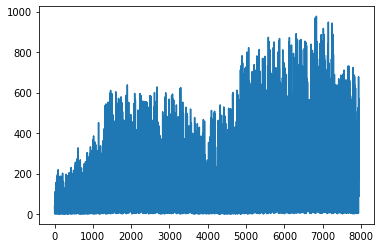

In [24]:
plt.plot(test_data['count'].to_list())

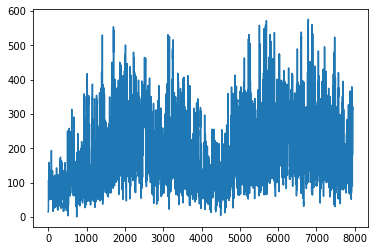

In [26]:
plt.plot(predictions['count'].to_list())

In [27]:
xx =  predictions['count']
yy =  test_data['count']

In [28]:
len(xx)

7947

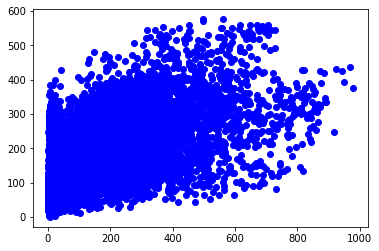

In [29]:
test_pred = plt.scatter(yy,xx, color='b')
#test_test = plt.scatter(y_test['count'], y_test['count'], color='g')
#plt.legend((test_pred, test), ('prediction', 'truth'), loc='upper left', fontsize=8)
plt.show()

In [33]:
n = len(xx)
k = 100
arx = np.zeros(n-k)


In [34]:
for i in range(0, n-k):
  s=0
  for j in range(k):
    s+= xx[i+j]
  arx[i] = s/k

In [35]:
ary = np.zeros(n-k)
for i in range(0, n-k):
  s=0
  for j in range(k):
    s+= yy[i+j]
  ary[i] = s/k

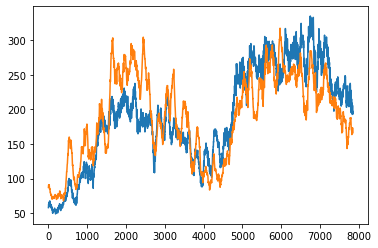

In [36]:
plt.plot(ary)
plt.plot(arx)